# 1 Logistic Regression
In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classication model that estimates an applicant's
probability of admission based on the scores from those two exams. 

## 1.1 Visualization
We will start by visualizing the data. The positive and negative examples are shown in different colors/markers.

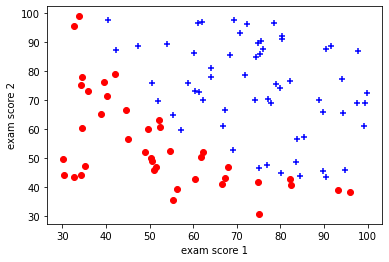

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = np.loadtxt('ex2data1.txt', delimiter=',')

m = len(data[:,0])
n = len(data[0,:])
X = np.ones(shape=(m,n))
X[:,1:3] = data[:,0:2]
y = data[:,2]

plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.show()

## 1.2 Implementation
### 1.2.1 Implement sigmoid function
Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as:
\begin{equation}
h(x) = g(\theta^T x)
\end{equation}
where function $g$ is the sigmoid function. The sigmoid function is defined as
\begin{equation}
g(z) = \frac{1}{1+e^{-z}}
\end{equation}
Your first step is to implement this function below so it can be
called by the rest of your program.

In [2]:
##TODO Implement the sigmoid function
def sigmoid(z):
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

Visualize the implemented sigmoid function

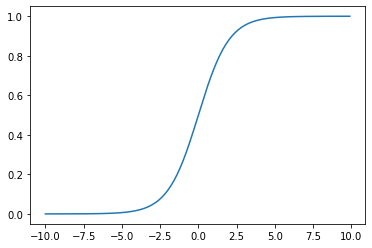

In [3]:
plt.plot(np.arange(-10,10,.1) ,sigmoid(np.arange(-10,10,.1)))
plt.show()

### 1.2.2 Implement Cost function and Gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in compute_cost and compute_gradient to return the cost and gradient.

Recall that the cost function in logistic regression is
\begin{equation}
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)})) \large]
\end{equation}
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0,1,\cdots,n$) is defined as follows:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}

In [4]:
def compute_cost(theta, X, y):
    h = sigmoid(X.dot(theta)).flatten()
    c = y*np.log(h) + (1-y)*np.log(1-h)
    return -c.sum()/len(y)

def compute_gradient(theta, X, y):
    #TODO implement the compute_gradient function
    h = sigmoid(X.dot(theta)).flatten()
    c = (h-y)*X[:,:1]
            
    return c.sum()/len(y)

### 1.2.3 Minimizing cost function
In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly.

In this assignment, we will use a scipy built-in function called [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).  It will find the best parameters theta for the logistic regression cost function given a fixed dataset (of X and Y values).

The parameters of the function are:
* function that computes cost
* initial theta
* arguments tuple
* gradient of the cost function

Once, minimize has finished finding the optimal $\theta$, you should see that the cost is about 0.203.

In [5]:
theta = np.array([0.,0.,0.])
res = minimize(fun=compute_cost, x0=theta, args=(X,y), jac=compute_gradient, method='BFGS')
compute_cost(res.x, X, y)

ValueError: shapes (3,3) and (1,) not aligned: 3 (dim 1) != 1 (dim 0)

### 1.2.4 Plotting Decision boundary

In [8]:
def plotDecisionBoundary(theta, X, y):
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:,1])-2,  np.max(X[:,1])+2])
    
    # Calculate the decision boundary line
    plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
    
    plt.scatter(X[np.where(y==1),1], X[np.where(y==1),2], marker = '+', c = 'b')
    plt.scatter(X[np.where(y==0),1], X[np.where(y==0),2], marker = 'o', c = 'r')
    plt.plot(plot_x, plot_y, c='y')
    plt.show()

In [9]:
plotDecisionBoundary(res.x, X, y)

NameError: name 'res' is not defined

### 1.2.5 Evaluating Logistic Regression
After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [ ]:
def predict(theta, x):
    h = sigmoid(x.dot(theta)).flatten()
    print(h)

In [ ]:
predict(res.x, np.array([1,45,85]))

### 1.2.6 Training Accuracy
Now using the learnt model, compute accuracy on the training dataset.

In [ ]:
def accuracy(X, actual_classes, probab_threshold=0.5):
  #TODO implement the accuracy function    

In [ ]:
accuracy(X, y)

In [ ]:
for i in range(X):
    print(i)